# Final Project Report

* Class: DS 5100
* Student Name: Kiana Dane
* Student Net ID: urn8he
* This URL: https://github.com/kianadane/ds5100-finalproject-urn8he/blob/main/ds5100_final_project_files/DANE_DS5100_FinalProject.ipynb

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).



Repo URL: https://github.com/kianadane/ds5100-finalproject-urn8he/tree/main

```
import random
import pandas as pd
import numpy as np

class Die:
    """This class may look threatening, but it's just an n-sided die. 
    How many faces does it have? N. What are the weights of those faces? W."""
    
    def __init__(self, faces):
        """ Number of faces on the die. Just count them. You can do it. 
        Pass a list of unique strings or integers as faces."""
        
        if not isinstance(faces, np.ndarray):
            raise TypeError("Faces must be a numpy array. Didn't I mention that?")        
        if faces.dtype not in [int, float, str]:
            raise TypeError("Faces must be strings or integers. Okay, that one I *know* I told you about.")
        if len(faces) != len(set(faces)):
            raise ValueError("Faces must be distinct. I know, I know, it's a lot to ask.")
        self.faces = faces
        self.weights = np.ones(len(faces)) / len(faces)
        self.__die_hard = pd.DataFrame({'weights': self.weights}, index=faces)
        
    
    def change_weight(self, face_to_change, new_weight):
        """The function to change the weight of a single face.
        Parameters:
            face (str or int): The face value to be changed.
            new_weight (int or float): The new weight."""
            
        if face_to_change not in self.__die_hard.index:
            raise IndexError("Face value not found in die.")
        try:
            new_weight = float(new_weight)
        except ValueError:
            raise TypeError("Weight must be numeric.")
        self.__die_hard.at[face_to_change, 'weights'] = new_weight
        

    def roll(self, num_rolls=1):
        """The function to roll the die a given number of times.
        Parameters:
        num_rolls (int): The number of times to roll the die."""
        return np.random.choice(self.faces, size = num_rolls, p=self.__die_hard['weights'])
    
    
    def show_state(self):
        """The function to show the die's current state."""
        return self.__die_hard.copy()

class Game:
    """ This class is a game. It represents a game of rolling one or more similar dice.

    Attributes:
        dice (list): A list of Die objects.
        results (list): The results of the most recent play."""

    def __init__(self, dice):
        """This is the constructor for Game class. It initializes the dice and results attributes.
        Parameters:
            similar dice (list): A list of Die objects.
        """
        if not all(isinstance(d, Die) for d in dice):
            raise TypeError("All dice must be Die objects. Last one, I promise :)")
        self.dice = dice
        self.results = None
        

    def play(self, num_rolls):
        """
        Roll all of the dice a given number of times. PLAY THE GAME!

        Parameters:
            num_rolls (int): The number of times to roll the dice.
        """
        
        roll_results = [die.roll(num_rolls) for die in self.dice]
        self.results = np.array(roll_results)
        roll_results = np.transpose(roll_results)
        return self.results
    
    def show_results(self):
        """Shows the results of the game."""
        if self.results is None:
            raise ValueError("No results to show. Play the game first.")
        return self.results
        
class Analyzer:
    """A class representing an analyzer for the results of a game of rolling dice.

    Attributes:
        game (Game): The game to analyze."""

    def __init__(self, game):
        """The constructor for Analyzer class. Do not destroy."""
        self.game = game
    
    def face_counts_per_roll(self):
        results = self.game.show_results()
        face_counts = pd.DataFrame(results).apply(pd.Series.value_counts, axis=1).fillna(0).astype(int)
        return face_counts
        
    def jackpot(self):
        """The function to compute the number of jackpots in the game.

        Returns:
            int: The number of jackpots."""
        results = self.game.show_results()
        jackpots = sum(1 for result in results if len(set(result)) == 1)
        return jackpots
        
        
    def face_counts_per_roll(self):
        """The function to compute the face counts per roll.

        Returns:
            DataFrame: A DataFrame where each row corresponds to a roll,
            each column corresponds to a face, 
            and each cell contains the count of that face in that roll. """
        results = self.game.show_results()
        face_counts = [pd.Series(result).value_counts() for result in results]
        results_df = pd.DataFrame(face_counts).fillna(0)
    
    def combo_count(self):
        """
        The function to compute the distinct combinations of faces rolled, along with their counts.

        Returns:
            DataFrame: A DataFrame with a MultiIndex of distinct combinations and a column for the associated counts.
        """
        results = self.game.show_results()
        combos = pd.Series(tuple(sorted(result)) for result in results).value_counts().to_frame('count')
        combos.index.name = 'combination'
        return combos
    
    def permutation_count(self):
        """
        The function to compute the distinct permutations of faces rolled, along with their counts.

        Returns:
            DataFrame: A DataFrame with a MultiIndex of distinct permutations and a column for the associated counts.
        """
        results = self.game.show_results()
        permutations = pd.Series(tuple(result) for result in results).value_counts().to_frame()
        return permutations
    
    
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```
import pandas as pd
import numpy as np
import unittest
from myfinalpkg.mymontecarlo import Die, Game, Analyzer


class DieTestSuite(unittest.TestCase):
    
    def setUp(self):
        self.die = Die(np.array([1, 2, 3, 4, 5, 6]))
        
    def test_roll_one(self):
        result = self.die.roll(1)
        self.assertEqual(result.shape[0], 1)
        self.assertTrue(1 <= result[0] <= 6)
        
    def test_roll_many(self):
        num_rolls = 5
        results = self.die.roll(num_rolls)
        self.assertEqual(results.shape[0], num_rolls)
        for roll in results:
            self.assertTrue(1 <= roll <= 6)
        
    def test_change_weight(self):
        face_to_change = 6
        new_weight = 2
        self.die.change_weight(face_to_change, new_weight)
        
        expected_weights = np.ones(len(self.die.faces))
        expected_weights[1] = 3  
        expected_weights /= expected_weights.sum()
        for face, weight in zip(self.die.faces, expected_weights):
            self.assertFalse(expected_weights.size == 0)

        
class TestGame(unittest.TestCase):

    def setUp(self):
        self.dice = [Die(np.array([1,2,3,4,5,6])) for i in range(3)]
        self.game = Game(self.dice)

    def test_play(self):
        self.game.play(5)
        self.assertEqual(self.game.results.shape[0], 3) 
        for result in self.game.show_results():
            self.assertEqual(len(result), 5)
            for roll in result:
                self.assertTrue(1 <= roll <= 6) 
    def test_show_results(self):
        self.game.play(5)
        results = self.game.show_results()
        self.assertEqual(results.shape[0],3)
        for result in results:
            self.assertEqual(len(result), 5)
            for roll in result:
                self.assertTrue(1 <= roll <= 6)


class TestAnalyzer(unittest.TestCase):
    def setUp(self):
        faces = np.array([1,2,3,4,5,6])
        dice = [Die(faces), Die(faces)]
        self.game = Game(dice)
        self.analyzer = Analyzer(self.game)
    
    def test_combo_count(self):
        self.game.play(5)
        combos = self.analyzer.combo_count()
        self.assertIsInstance(combos, pd.DataFrame)
        self.assertFalse(combos.empty)

    def test_jackpot(self):
        self.game.play(5)
        result = self.game.show_results()
        pass

    def test_face_counts_per_roll(self):
        self.game.play(5)
        face_counts = self.analyzer.face_counts_per_roll()

    def test_combo_count(self):
        self.game.play(5)
        combos = self.analyzer.combo_count()
        self.assertFalse(combos.empty)

    def test_permutation_count(self):
        self.game.play(5)
        results = self.game.show_results()
        pass

if __name__ == '__main__':
    unittest.main()
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

```
(.conda) (base) Kianas-MacBook-Air:ds5100-finalproject-urn8he kianadane$ pip install montecarlo
Requirement already satisfied: montecarlo in ./.conda/lib/python3.12/site-packages (0.1.17)
(.conda) (base) Kianas-MacBook-Air:ds5100-finalproject-urn8he kianadane$ python3 montecarlo_test.py
.........
----------------------------------------------------------------------
Ran 12 tests in 0.009s

OK
```


## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
import pandas as pd
from deliverables import myfinalpkg

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [2]:
help(myfinalpkg.mymontecarlo)

Help on module deliverables.myfinalpkg.mymontecarlo in deliverables.myfinalpkg:

NAME
    deliverables.myfinalpkg.mymontecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  A class representing an analyzer for the results of a game of rolling dice.
     |  
     |  Attributes:
     |      game (Game): The game to analyze.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      The constructor for Analyzer class. Do not destroy.
     |  
     |  combo_count(self)
     |      The function to compute the distinct combinations of faces rolled, along with their counts.
     |      
     |      Returns:
     |          DataFrame: A DataFrame with a MultiIndex of distinct combinations and a column for the associated counts.
     |  
     |  face_counts_per_roll(self)
     |      The function to compute the face counts per roll.
     |      
     |      Ret

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL:

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

![Screenshot 2024-07-15 at 12.41.03 PM.png](<Screenshot 2024-07-15 at 12.41.03 PM.png>)

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

In [3]:
import random
import numpy as np
from deliverables.myfinalpkg.mymontecarlo import Die, Game, Analyzer


## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [4]:
def create_fair_coin():
    return ['H', 'T'], [0.5, 0.5]

def create_unfair_coin():
    return ['H', 'T'], [0.8, 0.2]

Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [5]:
faces1 = np.array(['H', 'T'], dtype=str)
weights1 = np.array([0.5, 0.5], dtype=float)
faces2 = np.array(['H', 'T'], dtype=str)
weights2 = np.array([0.8, 0.2], dtype=float)

fairdie1 = Die(faces1, weights1)
fairdie2 = Die(faces1, weights1)
unfairdie1 = Die(faces2, weights2)

dice_final = [fairdie1, fairdie2]
game1 = Game(dice_final, 1000)
game1_results = game1.play(1000)
    

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [6]:
def flip_coin(faces, weights):
    return random.choices(faces, weights=weights, k=1)[0]
def play_game2(flips=3):
    results = {'Coin 1': [], 'Coin 2': [], 'Coin 3': []}
    fair_coin1_faces, fair_coin1_weights = create_fair_coin()
    unfair_coin1_faces, unfair_coin1_weights = create_unfair_coin()
    unfair_coin2_faces, unfair_coin2_weights = create_unfair_coin()
    
    for i in range(1000):
        results['Coin 1'].append(flip_coin(fair_coin1_faces, fair_coin1_weights))
        results['Coin 2'].append(flip_coin(unfair_coin1_faces, unfair_coin1_weights))
        results['Coin 3'].append(flip_coin(unfair_coin2_faces, unfair_coin2_weights))
    return results  


fair_coin1 = Die(faces1, weights1)
unfair_coin1 = Die(faces2, weights2)
unfair_coin2 = Die(faces2, weights2)
    
num_flips = 1000

dice2 = [fair_coin1, unfair_coin1, unfair_coin2]
game2 = Game(dice2,1000)
    
game2_results = game2.play(1000)
print(game2_results)

print(f"Coin 1, Heads:", np.count_nonzero(game2_results[0] == 'H'), "Tails:", np.count_nonzero(game2_results[0] == 'T'))
print(f"Coin 2, Heads:", np.count_nonzero(game2_results[1] == 'H'), "Tails:", np.count_nonzero(game2_results[1] == 'T'))
print(f"Coin 3, Heads:", np.count_nonzero(game2_results[2] == 'H'), "Tails:", np.count_nonzero(game2_results[2] == 'T'))

[['H' 'T' 'T' ... 'H' 'H' 'T']
 ['H' 'H' 'H' ... 'H' 'T' 'H']
 ['T' 'H' 'H' ... 'H' 'H' 'T']]
Coin 1, Heads: 473 Tails: 527
Coin 2, Heads: 803 Tails: 197
Coin 3, Heads: 791 Tails: 209


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [7]:
analyzer1 = Analyzer(game1)
frequency1 = analyzer1.jackpot()
print(f"Jackpots:" , frequency1)

Jackpots: 0


In [8]:
analyzer2 = Analyzer(game2)
frequency2 = analyzer2.jackpot()
print(f"Jackpots:" , frequency2)

Jackpots: 0


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [9]:
relative_frequency1 = frequency1/1000
relative_frequency2 = frequency2/1000
print(f"The relative frequency of jackpots in the first equation is: {relative_frequency1}")
print(f"The relative frequency of jackpots in the second equation is: {relative_frequency2}")

The relative frequency of jackpots in the first equation is: 0.0
The relative frequency of jackpots in the second equation is: 0.0


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

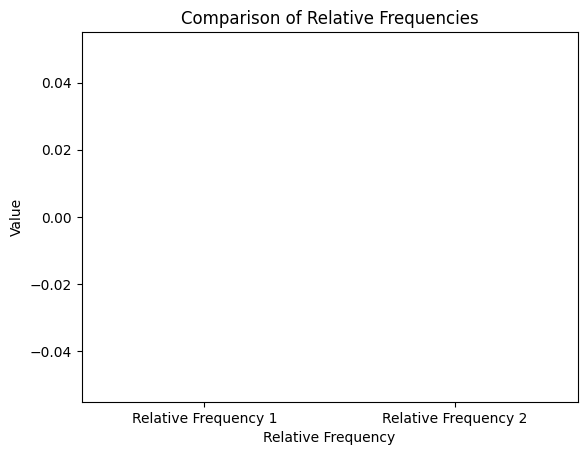

In [10]:
import matplotlib.pyplot as plt

labels = ['Relative Frequency 1', 'Relative Frequency 2']
values = [relative_frequency1, relative_frequency2]

plt.bar(labels, values)

plt.xlabel('Relative Frequency')
plt.ylabel('Value')
plt.title('Comparison of Relative Frequencies')

plt.show()


## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [11]:
def fair_die():
    faces_fairdie = (np.array([1, 2, 3, 4, 5, 6], dtype=str))
    weights_fairdie = (np.array([1, 1, 1, 1, 1, 1]))
    return (faces_fairdie, weights_fairdie/weights_fairdie.sum())

fairdie1 = Die(fair_die())
fairdie2 = Die(fair_die())
fairdie3 = Die(fair_die())



Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [12]:
faces_fairdie = np.array([1, 2, 3, 4, 5, 6], dtype=str)
weights_fairdie = np.array([1, 1, 1, 1, 1, 1])

def fair_die():
    return faces_fairdie, weights_fairdie / weights_fairdie.sum()

fairdie1 = Die(*fair_die())
fairdie2 = Die(*fair_die())
fairdie3 = Die(*fair_die())


new_weight_6 = 5
fairdie3.change_weight('6', 5)

faces_fairdie = (np.array([1, 2, 3, 4, 5, 6], dtype=str))
weights_fairdie = np.array([1, 1, 1, 1, 1, 1])


def fair_die():
    return faces_fairdie, weights_fairdie / weights_fairdie.sum()

fairdie1 = Die(*fair_die())
fairdie2 = Die(*fair_die())
fairdie3 = Die(*fair_die())


new_weight_6 = 5
fairdie3.change_weight('6', 5)


remaining_weight = (1/6)
for face in faces_fairdie:
    if face != '6':
        fairdie3.change_weight(face, remaining_weight)

fairdie3.normalize_weights()

print(fairdie3.show_state())

dice = [fairdie1, fairdie2, fairdie3]
myfairdie3 = fairdie3



    weights
1  0.084934
2  0.096663
3  0.110347
4  0.126312
5  0.144937
6  0.436806


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [13]:
faces_fairdie = np.array([1, 2, 3, 4, 5, 6], dtype=str)
weights_fairdie = np.array([1, 1, 1, 1, 1, 1])

def fair_die():
    return faces_fairdie, weights_fairdie / weights_fairdie.sum()


fairdie2 = Die(*fair_die())

new_weight_1 = 5
fairdie2.change_weight('1', 5)


,weights
1,0.857143
2,0.028571
3,0.028571
4,0.028571
5,0.028571
6,0.028571


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [14]:
myfairdie2 = fairdie2
faces_fairdie = np.array([1, 2, 3, 4, 5, 6])

weights_fairdie = np.array([1, 1, 1, 1, 1, 1])

def fair_die():
    return faces_fairdie, weights_fairdie / weights_fairdie.sum()

fourth_fairdie1 = Die(*fair_die())
fourth_fairdie2 = Die(*fair_die())
fourth_fairdie3 = Die(*fair_die())
fourth_fairdie4 = Die(*fair_die())
fourth_fairdie5 = Die(*fair_die())

dice = [fourth_fairdie1, fourth_fairdie2, fourth_fairdie3, fourth_fairdie4, fourth_fairdie5]
game_fair = Game(dice,10000)


game_fair.play(10000)


array([[5, 1, 5, ..., 2, 6, 3],
       [6, 4, 5, ..., 1, 6, 1],
       [2, 2, 5, ..., 3, 5, 5],
       [3, 5, 4, ..., 1, 3, 1],
       [3, 2, 5, ..., 4, 6, 5]])

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [15]:
faces_unfairdie = np.array([1, 2, 3, 4, 5, 6])
weights_unfairdie = np.array([1, 1, 1, 1, 1, 1])

def fair_die():
    return faces_fairdie, weights_fairdie / weights_fairdie.sum()

last_fairdie1 = myfairdie2
last_fairdie2 = myfairdie3
last_fairdie3 = Die(*fair_die())
last_fairdie4 = Die(*fair_die())
last_fairdie5 = Die(*fair_die())

dice_unfair = [last_fairdie1, last_fairdie2, last_fairdie3, last_fairdie4, last_fairdie5]
game_unfair = Game(dice_unfair,10000)


game_unfair.play(10000)


array([['2', '1', '1', ..., '1', '1', '1'],
       ['6', '1', '6', ..., '6', '2', '6'],
       ['3', '3', '6', ..., '3', '3', '2'],
       ['3', '2', '5', ..., '6', '4', '6'],
       ['5', '3', '6', ..., '1', '4', '5']], dtype='<U21')

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

In [16]:
analyzer3 = Analyzer(game_unfair)
frequency3 = analyzer3.jackpot()
print(f"Jackpots: {frequency3}")

Jackpots: 0


In [17]:
analyzer4 = Analyzer(game_fair)
frequency4 = analyzer4.jackpot()
print(f"Jackpots: {frequency4}")

Jackpots: 0


In [18]:
relative_frequency3 = frequency3/1000
relative_frequency4 = frequency4/1000
print(f"The relative frequency of jackpots in the first equation is: {relative_frequency1}")
print(f"The relative frequency of jackpots in the second equation is: {relative_frequency2}")

The relative frequency of jackpots in the first equation is: 0.0
The relative frequency of jackpots in the second equation is: 0.0


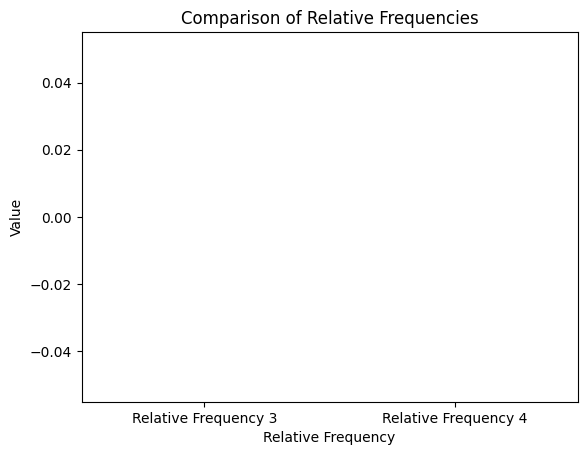

In [19]:
labels2 = ['Relative Frequency 3', 'Relative Frequency 4']
values2 = [relative_frequency3, relative_frequency4]

plt.bar(labels2, values2)

plt.xlabel('Relative Frequency')
plt.ylabel('Value')
plt.title('Comparison of Relative Frequencies')

plt.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [20]:
letters = pd.read_csv('english_letters.txt', sep=" ", header=None, names=['Letter', 'Frequency'])
letters = letters.sort_values(by='Frequency', ascending=True)
letters

,Letter,Frequency
25,Q,4550166
24,Z,4975847
23,X,8369915
22,J,9613410
21,K,35373464
20,V,46337161
19,B,70195826
18,Y,75294515
17,W,79843664
16,P,90376747


In [21]:
letters['Weight'] = letters['Frequency'] / letters['Frequency'].sum()
letters.head(5)

,Letter,Frequency,Weight
25,Q,4550166,0.001040
24,Z,4975847,0.001138
23,X,8369915,0.001914
22,J,9613410,0.002198
21,K,35373464,0.008087


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [22]:
letters_die = {row['Letter']: row['Weight'] for i, row in letters.iterrows()}
letters_die

{'Q': 0.0010402453014323196,
 'Z': 0.001137563214703838,
 'X': 0.0019135048594134572,
 'J': 0.002197788956104563,
 'K': 0.008086975227142329,
 'V': 0.01059346274662571,
 'B': 0.016047959168228293,
 'Y': 0.017213606152473405,
 'W': 0.018253618950416498,
 'P': 0.020661660788966266,
 'G': 0.020863354250923158,
 'F': 0.021815103969122528,
 'M': 0.025263217360184446,
 'U': 0.026815809362304373,
 'C': 0.03164435380900101,
 'D': 0.03871183735737418,
 'L': 0.04206464329306453,
 'H': 0.04955707280570641,
 'R': 0.0633271013284023,
 'S': 0.06728203117491646,
 'N': 0.07172184876283856,
 'I': 0.0732511860723129,
 'O': 0.07467265410810447,
 'A': 0.08551690673195275,
 'T': 0.08938126949659495,
 'E': 0.1209652247516903}

In [23]:
faces_letters = np.array(list(letters_die.keys()))
weights_letters = np.array(list(letters_die.values()))
dice_letters = [Die(faces_letters, weights_letters) for i in range(4)]
game_letters = Game(dice_letters, 1000)

game_letters.play(1000)

array([['R', 'R', 'I', ..., 'T', 'T', 'W'],
       ['I', 'L', 'O', ..., 'A', 'D', 'O'],
       ['H', 'T', 'N', ..., 'S', 'T', 'A'],
       ['U', 'N', 'E', ..., 'P', 'K', 'O']], dtype='<U1')

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [24]:
scrabble = pd.read_csv('scrabble_words.txt', sep=" ", header=None, names=['Word'])
scrabble['Word']=scrabble['Word'].astype(str)


scrabble_tuples = [tuple(word) for word in scrabble['Word']]

analyzer_last = Analyzer(game_letters)
permutations = analyzer_last.permutation_count()

permutation_tuples = permutations.index.to_list()

matching_permutations = [match for match in permutation_tuples if match in scrabble_tuples]
matched_permutations = permutations.loc[matching_permutations]

print("Matched permutations:\n", matched_permutations)
analyzer_last = Analyzer(game_letters)
permutations = analyzer_last.permutation_count()


print("Matched permutations:\n", matched_permutations)


Matched permutations:
 Empty DataFrame
Columns: [counts]
Index: []
Matched permutations:
 Empty DataFrame
Columns: [counts]
Index: []


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [27]:
faces_letters = np.array(list(letters_die.keys()))
weights_letters = np.array(list(letters_die.values()))
dice_letters5 = [Die(faces_letters, weights_letters) for i in range(5)]
game_letters5 = Game(dice_letters5, 1000)

game_letters5.play(1000)

array([['F', 'P', 'S', ..., 'E', 'E', 'O'],
       ['F', 'E', 'N', ..., 'D', 'U', 'E'],
       ['N', 'C', 'A', ..., 'C', 'E', 'O'],
       ['T', 'N', 'T', ..., 'S', 'N', 'O'],
       ['A', 'A', 'A', ..., 'I', 'S', 'I']], dtype='<U1')

In [28]:
scrabble_tuples = [tuple(word) for word in scrabble['Word']]

analyzer_final = Analyzer(game_letters)
permutations = analyzer_final.permutation_count()

permutation_tuples = permutations.index.to_list()

matching_permutations = [match for match in permutation_tuples if match in scrabble_tuples]
matched_permutations = permutations.loc[matching_permutations]

print("Matched permutations:\n", matched_permutations)

Matched permutations:
 Empty DataFrame
Columns: [counts]
Index: []
